In [10]:
directory = "0517_split_2/train/"
import glob
import json

obj_by_forum = collections.defaultdict(list)
for file_name in glob.glob(directory+"/*"):
    with open(file_name, 'r') as f:
        obj = json.load(f)
        obj_by_forum[obj["metadata"]["forum_id"]].append(obj)
all_objs = sum(obj_by_forum.values(), [])

153
41


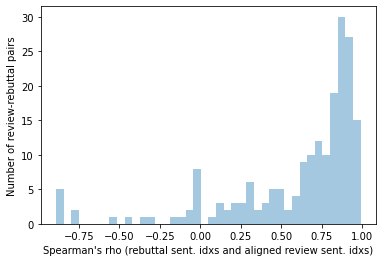

In [17]:
import collections
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
all_alignments = collections.defaultdict(list)

for obj in all_objs:
    rev_id = obj["metadata"]["review"]
    assert rev_id not in all_alignments
    for reb_i, rebuttal_label in enumerate(obj["rebuttallabels"]):
        alignments = rebuttal_label["labels"]["alignments"]
        for alignment_i in alignments:
            all_alignments[rev_id].append({
                "rev_idx": alignment_i,
                "reb_idx": reb_i
            })
            
spearmen = []
for rev_id, data in all_alignments.items():
    b = pd.DataFrame(data)
    #print(b)
    maybe_value = b.corr('spearman')["rev_idx"]["reb_idx"]
    if str(maybe_value) == "nan":
        continue
    else:
        spearmen.append(b.corr('spearman')["rev_idx"]["reb_idx"])
    
sns.distplot(spearmen, bins=40, kde=False)
plt.ylabel("Number of review-rebuttal pairs")
plt.xlabel("Spearman's rho (rebuttal sent. idxs and aligned review sent. idxs)")
print(len([i for i in spearmen if i < 0.9]))
print(len([i for i in spearmen if i >= 0.9]))
plt.savefig("spearmen.png")

In [13]:
41/(153+41)

0.211340206185567